<a href="https://colab.research.google.com/github/LUPRWEST/machine-learning/blob/main/machine_learning_quick_start_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

💡본 colab 파일은 간편하고 빠르게 CNN 기반의 머신러닝을 돌리기 위한 가이드입니다. 

💡코드와 기본적인 설명으로 이루어져 있습니다. 간단하게 머신러닝을 돌려 보세요!

*❕ python 문법과 구글 colab, 머신러닝에 대한 기초적인 지식을 가지고 있는 사람을 대상으로 작성되었습니다.*




---



### 간단한 사용 방법 🖱️



```
print("###")
```
'###' 을 지운 후 코드를 작성해 주세요. (아래는 예시)

```
print("Hello World!")
```


### 머신러닝의 기본적인 과정 ⚡

1.   주제 선정 및 데이터셋 수집
2.   데이터셋 업로드 및 이미지 전처리
4.   모델 디자인
4.   모델 컴파일
5.   모델 학습
6.   모델 평가





## 1. 주제 선정 및 데이터셋 수집 ☕

스스로 만들고 싶은 머신러닝 모델을 계획해 봅시다. 간단하게 개와 요양이를 분류할 수도, 0부터 9까지의 숫자를 분류할 수도 있습니다. CNN 기반의 분류 모델을 만들 것이기 때문에 이미지로 분류할 수 있는 주제여야 하는 걸 잊지 마세요.

데이터셋은 [Kaggle](https://www.kaggle.com)에서 찾을 수 있습니다. (검색 키워드: classification, cnn) 

*(tip: 인기 많은 데이터이거나 데이터의 설명이 자세할 수록 좋은 데이터일 확률이 높습니다!)*

데이터셋을 찾았다면 데이터셋의 정보를 적어 봅시다: (클레스*(❕ 분류하고 싶은 항목의 개수입니다. 개와 고양이를 분류할 때 클레스의 수는 2가 됩니다.)* 수), (이미지 크기), (흑백 또는 RGB), (한 클레스 당 이미지 수)

(예: 2, 28*28, 흑백, 약 500장)

원활한 데이터 수집을 위해 유명한 데이터셋을 추천해 드립니다:

*   [COVID-19 Xray Dataset](https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets)

*   [Cat VS Dog Dataset](https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset)

* [Muffin vs chihuahua](https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification)


### 데이터 정리 🎨
방금 막 다운받은 따끈따끈한 데이터들은 정리되지 않은 날것의 상태입니다. 쓸모없는 이미지는 삭제하거나, 이미지의 수가 너무 많은 경우에는 적당한 수로 줄여 주는게 좋습니다. 머신러닝 모델은 데이터 수가 많을수록 좋지만 너무 많을 경우에는 구글 colab이 감당할 수 없으니 주의해 주세요.

test와 train으로 파일이 분류되지 않은 데이터셋이라면, 직접 폴더를 만들어서 test와 train으로 분류해 줄 필요가 있습니다. 이때 test와 train폴더 안에는 분류할 클레스의 사진을 넣은 폴더가 동일하게 들어가 있어야 합니다. 이미지를 넣은 폴더의 이름이 해당 클레스의 이름이 되므로 참고해 주세요!

정리가 되었다면 본인의 구글 드라이브에 data 폴더를 만들고 그 안에 test와 train 폴더를 넣은 하나의 테이터셋 폴더를 업로드해 줍시다.

*주의: 데이터셋 폴더의 이름은 잊거나 헷갈리지 않게 명확한 이름으로 설정해 주세요!*

---

####데이터 정리 예시:
내 드라이브 > data > xray_dataset_covid19 > train/test > NOMAL/PNEUMONIA

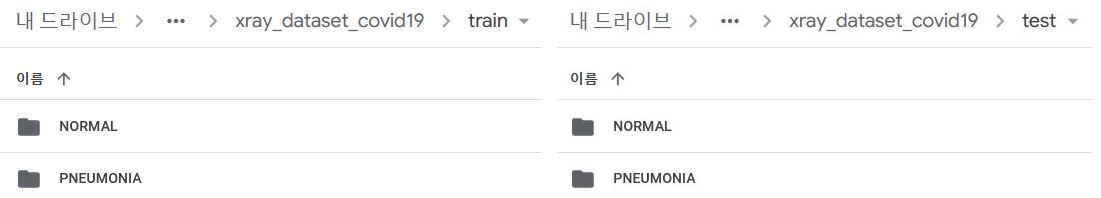

## 2-1. 데이터셋 업로드 ⛲

colab에서 데이터를 업로드 하는 방법에는 여러가지가 있지만, 자신의 구글드라이브에서 파일을 불러오는 방법을 추천합니다. 왜냐하면 인터넷이 연결 된 어디에서나 자신의 colab파일을 열어 볼 수 있기 때문입니다. 

드라이브를 불러온 후 팝업창을 따라 로그인해 주세요. ###에는 본인이 설정한 데이터셋의 폴더 이름을 적어 줍시다. 

아래는 예시: 

```
/content/gdrive/My Drive/data/xray_dataset_covid19
```



In [ ]:
# 드라이브 불러오기
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/data/###/"

from google.colab import drive
drive.mount('/content/gdrive')
일
%cd /content/gdrive/My Drive/data/###

본인이 불러온 폴더 안에 있는 파일을 확인할 수 있습니다. 큰 이상이 없다면, train과 test가 출력됩니다. 

In [ ]:
# 파일 확인
!ls

아래의 코드는 머신러닝을 만들기 위한 python의 기능을 사용하기 위하여 라이브러리를 불러오는 코드입니다. 실행시켜 줍시다.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy
import os 
import tensorflow as tf
import cv2

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

## 2-2. 이미지 전처리 ⏳

이제 이미지들을 요리할 차례입니다. 이미지들의 크기가 너무 크거나 다를 수 있고, 그 밖에도 부족한 부분이 있을 수 있기 떄문에 전처리 과장을 거쳐야 합니다. 이때 사용하는 함수가 ImageDataGenerator입니다. 사용하는 데이터의 수가 부족한 경우 이 함수를 이용하여 과적합을 방지할 수 있습니다.


다양한 기능이 존재하니 한번 사용해 보는 걸 추천합니다!


```
target_size= (###, ###)

```

  이미지 파일의 크기를 조정할 수 있습니다. 적당하게 설정해 주세요. (예: 128, 128)

```
class_mode= '###'
``` 
 예측할 클레스의 개수입니다. 2개일 경우 binary, 2개 이상일 경우 categorical.

---
그 밖의 기능:

◾ rotation_range: 이미지 회전

◾ shear_range: 이미지 이동

◾ zoom_range: 이미지 확대/축소

◾ horizontal_flip / vertical_flip: 이미지 수평/수직 뒤집음

아래는 사용 예시입니다.


```
rain_datagen = ImageDataGenerator(rescale= 1./255, zoom_range = 0.2, rotation_range = 90, 
                                   horizontal_flip= True)
```





In [ ]:
#train 데이터 전처리

train_datagen = ImageDataGenerator(rescale= 1./255)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size= (###, ###)
                                                 batch_size= 32,
                                                 class_mode= '###')

In [ ]:
#test 데이터 전처리

test_datagen = ImageDataGenerator(rescale= 1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size= (###, ###),
                                            batch_size= 32,
                                            class_mode= '###')

##3. 모델 디자인 ⛅

해당 가이드에서 사용하는 CNN 모델은 2개의 Convolution layer로 이루어져 있으며, 아래 그림과 구조가 동일합니다. 

아래의 모델을 이해하기 위해선 CNN의 이해가 필요합니다. 간단하게 설명하자면, 기존의 인공신경망 모델에 이미지 분류를 위한 과정이 추가되어있는  구조입니다. 구글에 CNN을 검색해 보세요.

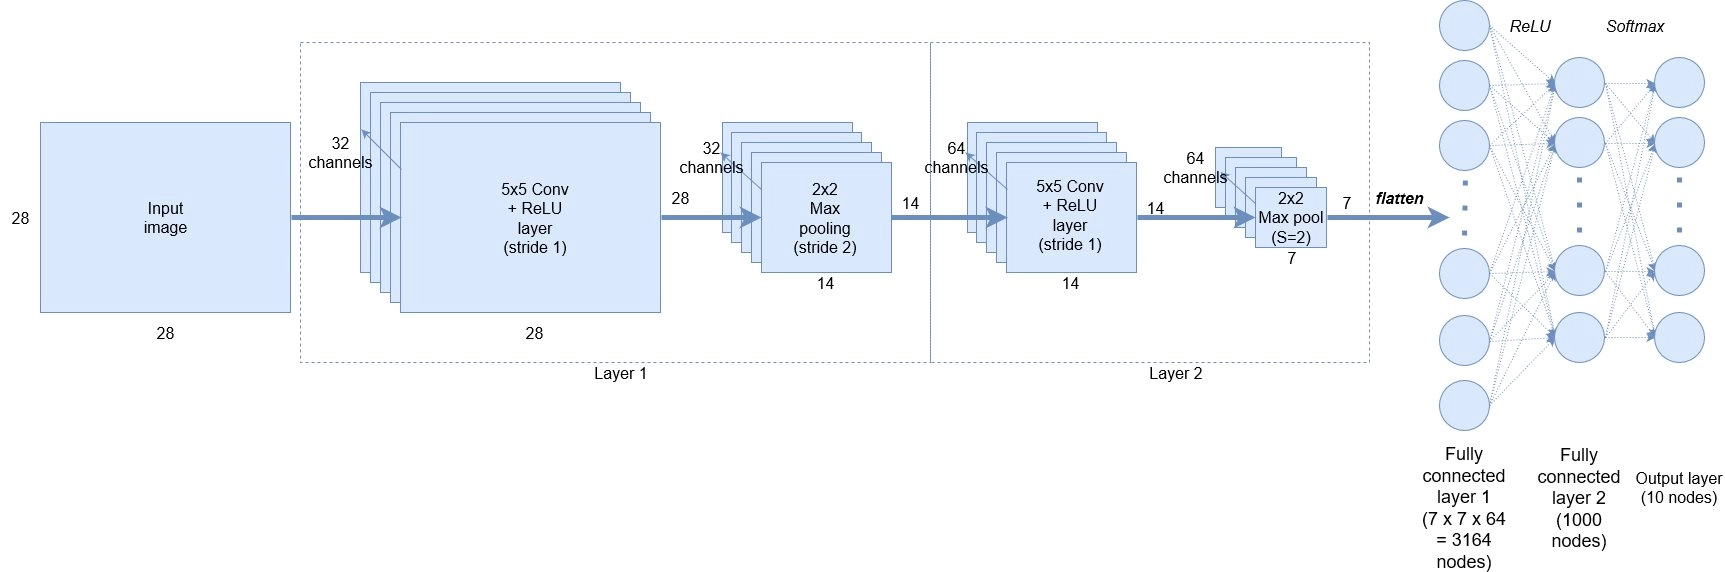

```
# Convolution layer

input_shape = (###, ###, ###)))
```

이미지의 크기와 특성값을 적어줍시다. 흑백 이미지라면 마지막 값이 1, RGB라면 마지막 값이 3입니다. (예: 128, 128, 3)


```
# fully connected layer 

model.add(Dense(###, activation='###'))
```
Dense 바로 다음에는 예측할 클래스의 수를 적어줍시다. 클레스가 두개일 경우에는 2가 됩니다. 이때 예측할 클래스가 2개라면 활성화 함수(activation)는 sigmoid, 2개 이상일 경우에는 softmax입니다. (예: 3, activation= 'softmax')


In [ ]:
# model design

# Convolution layer

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (###, ###, ###)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64,(3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# fully connected layer 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(###, activation='###'))

아래의 코드를 통해 구현한 모델을 요약할 수 있습니다. 간단하게 Layer(type)행에 Conv2D란 단어가 2번 반복되고 있는지, Flatten이란 단어가 보이고 있는지 확인해 줍시다. 둘 다 찾을 수 있다면 문제없이 모델을 디자인한 것입니다! 더 자세히 보고 싶다면, 위에 있는 cnn모델 그림과 작성한 모델 디자인 코드와 비교해 봅시다.

In [ ]:
model.summary()

##4. 모델 컴파일 ✨

모델 컴파일 과정입니다. 손실 함수와 최적화 함수를 적당히 설정해 줍시다.

손실 함수(loss): 예측할 클레스의 개수가 2개라면 binary_crossentropy, 2개 이상이라면 categorical_crossentropy입니다.

최적화 함수(optimizer): adam, SGD


In [ ]:
# model compile
model.compile(loss= '###',
              optimizer= ###(learning_rate = 0.01), 
              metrics=['accuracy'])

##5. 모델 학습 ⌚

이제 머신러닝을 학습시킬 순간입니다! 

```
history = model.fit(train_set, epochs = ###)
```
의 코드에서 epochs을 설정할 수 있습니다. 


혹은 아래의

```
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_set, validation_data = test_set, epochs = ###, callbacks=[early_stop])
```
의 코드에서 epochs을 설정할 수 있습니다. 위의 코드는 early stop을 사용하는 코드입니다. 간단하게 설명하자면, 정확도가 가장  높은 순간에 학습을 멈추는 코드입니다. early stop에 대해 더 자세히 알고 싶다면 구글에 검색해 보세요. 


*팁: 모델을 학습시킬 때 시간을 효율적으로 쓰기 위해서 GPU로 설정을 바꾸는 것이 좋습니다. 상단의 런타임 > 런타임 유형으로 들어가면 바꿀 수 있습니다. 하지만 GPU를 너무 많이 사용할 경우에는(별로 없긴 합니다만)GPU사용이 불가할 수 있으니 주의해 주세요.*



In [ ]:
# model training 

history = model.fit(train_set, epochs = ###)

In [ ]:
# model training (early stop)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_set, validation_data = test_set, epochs = ###, callbacks=[early_stop])

정확도(acc)가 너무 적게 나올 수 있습니다. 다양한 방법을 시도하면서 최고의 정확도를 찾아봅시다.

정확도를 높이기 위해서는:

1. model training 과정에서 학습 횟수(epochs)를 조절한다
2. model compile 과정에서 회적화 함수(optimizer)를 바꾼다
3. model compile 과정에서 lerning late의 값을 바꾼다(예: 0.095)
4. 데이터셋을 정리한다 or 수를 늘린다

등이 있을 수 있습니다.

하지만 사용하는 데이터 자체의 문제일 수도 있으니 잘 생각하면서 해결해 봅시다.

#### 학습 정확도, 손실 그레프 시각화 🩹

In [ ]:
plt.figure(1)
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='training_loss')
plt.legend()
plt.show()

##6. 모델 평가 🥰

수험공부를 했다면 수능을 봐야 하듯, 머신러닝 모델도 학습과 훈련을 끝내면 test 데이터를 이용하여 시험, 즉 평가를 진행해야 합니다. 평가한 모델의 정확도(acc)를 확인해 보세요!

In [ ]:
# model evaluate
test_loss, test_acc = model.evaluate(test_set) 
print(test_loss)
print(test_acc)

이렇게 머신러닝 모델 구현이 완료되었습니다! 

만약 학습 단계에서의 정확도와 평가 단계에서의 정확도와 큰 차이가 난다면 과적합을 의심해야합니다. 
과적합이 발생하는 이유는 데이터의 수가 너무 적기 때문일 수 있습니다. 학습단계에서 정확도를 높일 때 처럼 비슷한 방법으로 이것저것 시도해 보면서 과적합을 해결해 봅시다. 하지만 가장 간단한 과적합의 해결 방법은 데이터의 수를 늘리는 것입니다.


## 마무리 👋

즐겁게 머신러닝 모델을 구현해 보셨나요? 해당 머신러닝 퀵스타트 가이드의 문제점을 수집하고 보완하고자 여러분의 사용자 경험 설문조사를 실시하고 있습니다. 오래 걸리지 않는 설문이므로 참여해 주시면 정말! 감사하겠습니다!!

👉👉 [사용자 경험 설문조사](https://docs.google.com/forms/d/e/1FAIpQLSc22uvnmTvqC9AcCipmHD2l0Z4MbDDmGen0g5ocLH6oYkP_6w/viewform?usp=sf_link)

### 로그 🎱

*   2022 10 31 초안 작성
*   2022 11 03 수정
*   2023 03 30 수정
*   2023 05 19 수정
*   2023 05 21 수정
*   2023 05 22 최종 수정



❕ 참고: 해당 코렙 파일을 다운받을 수 있습니다! [다운받기(GitHub)](https://github.com/LUPRWEST/machine-learning/blob/main/machine_learning_quick_start_guide.ipynb)